# MCMC 1: the Metropolis-Hastings algorithm & the target function

In this notebook, we will see how a Markov Chain based on the Metropolis-Hastings algorithm manages to sample a target distribution.

In [1]:
### Import necessary python packages

# math package
import numpy as np
import random

# plotting packages
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
### Setup plot options

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"


## 1.1 Sampling a 1D normal distribution with MCMC

In this section, we will create a Markov Chain to sample a 1-dimensional normal distribution. The objective is to demonstrate that the Markov chain steps follows the target distribution, and to become familiar with the algorithm steps. 
The following setup is chosen: 
- Target function $T(x)$: normal function with mean $\mu_{T} = 0$, standard deviation $\sigma_{T}=1$
- Jump function $J(x)$: Gaussian function with standard deviation $\sigma_{J}=1$
- MCMC algorithm: Metropolis-Hastings

### 1.1.1 Define the target function

In [3]:
### Define a normal distribution as the target function

def normal(x, mean=0, sigma=1): 
    fac = 1 / (sigma * np.sqrt(2 * np.pi))
    exp = np.exp( (-1/2) * (( (x - mean) / sigma)**2 ) )
    return fac * exp

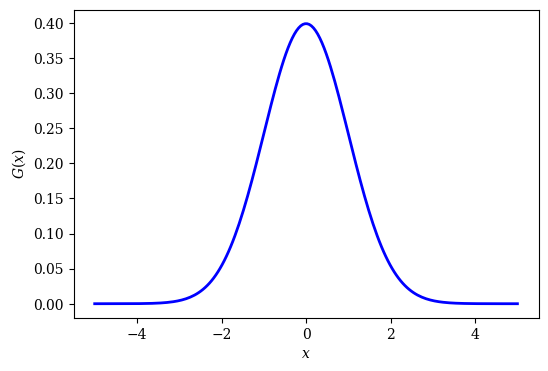

In [16]:
### Make a graph of the normal distribution 

# create a figure 
fig, ax = plt.subplots(figsize = (6,4))

# plot the target function
target_x =  np.linspace(-5, 5, 200)
target_y = []
for x in target_x:
    target_y.append(normal(x))
ax.plot(target_x, target_y, lw=2, c='blue')

# titles and axis
#ax.set_title('Target distribution ')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$G(x)$')

plt.savefig("target distribution.png") 

### 1.1.2 Define the jump function

In [5]:
### Define a Gaussian jump function J(x,y) 

jump_std = 1

def jump(x, y): 
    j = np.exp( (-1/2) * (((x-y) / jump_std )**2) )
    return j

### 1.1.3 Initialise the Markov Chain by computing the first step
The first step is always accepted. 

In [6]:
### Create array to store step and target function evaluation values
#0 ligne steps
#1 ligne données
donnees = np.array([])
steps = np.array([])

In [7]:
### Chose initial first value in [-1, 1] and compute the value of T(x)
i = 1

x = random.uniform(-1,1)

donnees = np.append(donnees,x)
steps = np.append(steps,i)

### 1.1.4 Generate a 2nd step and apply Metropolis-Hastings algorithm


In [8]:
### Propose a new value with the jump function 
i = i + 1

x_plus_un = random.uniform(-1,1)
jump(x1 + 1, x1)

steps = np.append(steps,i)

NameError: name 'x1' is not defined

In [9]:
### Compute the Metropolis-Hastings ratio and apply the acceptance function

r = (normal(x_plus_1,0,1)*jump(x,x_plus_1)) / (normal(x,0,1)*jump(x_plus_1,x))
print("r =",r)

if r < 1 :
    u = random.uniform(0,1)
    print("u = ",u)
    if r< u :
        x_plus_un = x

donnees = np.append(donnees,x_plus_un)
print("x = ",x)
print("x+1 =", x_plus_un)


NameError: name 'x_plus_1' is not defined

### 1.1.5 Iterate the process to compute 100'000 steps

Apply the process of steps 1 and 2 in a for loop to generate 100'000 steps

In [10]:
# Définition de la Gaussienne
def normal(x, mean=0, sigma=1): 
    fac = 1 / (sigma * np.sqrt(2 * np.pi))
    exp = np.exp((-1/2) * (((x - mean) / sigma)**2))
    return fac * exp

# Valeur du pas ?
jump_std = 1

# Fonction Jump(x_i+1/x_i)
def jump(x, y): 
    j = np.exp((-1/2) * (((x - y) / float(jump_std))**2))
    return j

def newjump(x):
    return np.random.normal(loc = x, scale = jump_std)

# Fonction A(x_i+1 / x_i)
def A(x_plus_un, x):
    # Calcul de r
    r = ((normal(x_plus_un, 0, 1) * jump(x, x_plus_un))) / float(((normal(x, 0, 1) * jump(x_plus_un, x))))
    if r >= 1:
        # r est plus grand que 1 : on accepte et on return x_i+1
        return x_plus_un
    else:
        # on prend un nombre aléatoire en 0 et 1
        u = random.uniform(0, 1)
        if r < u:
            # r est plus petit que u : on refuse et on return une deuxième fois la valeur de x_i
            return x
        else:
            # r est plus grand que u : on accepte et on return x_i+1
            return x_plus_un

# Algorithme de Metropolis Hastings
def metropolis_hastings(donnees, steps, i):
    #On prend un nombre aléatoire entre -4 et 4 
    x = random.uniform(-4, 4)
    #x = 10
    for j in range(i):
        if j == 0:                                       # Quand j = 0 on accepte forcément
            donnees = np.append(donnees, x)
            steps = np.append(steps, 0)
        else:
            x_plus_un = np.random.normal(loc=donnees[-1], scale=jump_std)      # On tire un autre nombre aléatoire x_i+1
            temp = A(x_plus_un, x)                       # On atribue la valeur retournée par la fonction A
            donnees = np.append(donnees, temp)           # On append la valeur de x_i ou x_i+1 suivant la fonction A
            steps = np.append(steps, j)
            x = temp                                     # x_i devient soit x_i soit x_i+1
    return steps, donnees

# Nombre de steps
i = 100000

# Initialisation des arrays
donnees = np.array([])
steps = np.array([])

# Éxécution de l'algorithme 
steps, donnees = metropolis_hastings(donnees, steps, i)

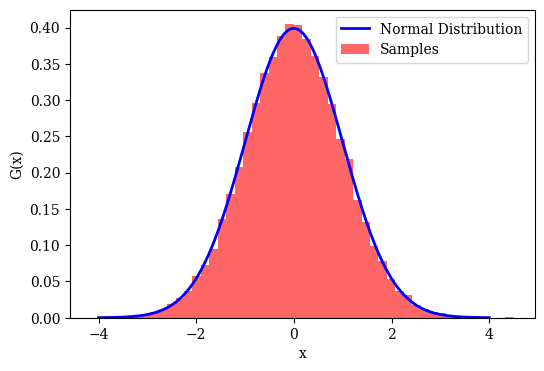

In [13]:
### Plot the MCMC steps in a histogram and compare with the target function

# W sert à définir la taille des bins
w = 0.05
#plt.hist(donnees, bins=np.arange(min(donnees), max(donnees) + w, w), density=True, alpha = 0.6, color='red')
fig, ax = plt.subplots(figsize = (6,4))

plt.hist(donnees, bins= 50, density=True, alpha = 0.6, color='red')

# Plot normal distribution
target_x = np.linspace(-4, 4, 400)
target_y = normal(target_x)
plt.plot(target_x, target_y, lw=2, c='blue')

# Titres des axes
#plt.title('Metropolis-Hastings Sampling vs. Normal Distribution')
plt.xlabel('x')
plt.ylabel('G(x)')

plt.legend(['Normal Distribution', 'Samples'])

plt.savefig("Échantillonnage.png") 

plt.show()



In [ ]:
### Extract the MCMC distribution mean and variance and compare with the target function

print("Moyenne par MH : ", np.mean(donnees))
print("Variance par MH : ", np.var(donnees))


### 1.1.6 A bit more tests

- What happens if the first step is $x=10$ ? 
- What happens if you step the jump function variance to 0.0001 ? To 100 ?

Si $x_i = 10$, cela ne change rien, la gaussienne sera quand même approximée par l'algorithme de Métropolis-Hastings.
Quand jump_std = 0.0001, on se retrouve avec une courbe quasi plate car l'échantillon est confiné dans une trop petite plage de valeur. C'est pas faux, mais il faut plus de steps pour voir la gaussienne finale. Une chaine de Markov converge toujours, mais il faut parfois du temps.


